<a href="https://colab.research.google.com/github/tuba89/MarketBasket/blob/main/AassociationRulesCheck.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

plt.rcParams['figure.figsize'] = (11, 4)

#Part I: small dataset

In [ ]:
dataset = [['Skirt', 'Sneakers', 'Scarf', 'Pants', 'Hat'],
        ['Sunglasses', 'Skirt', 'Sneakers', 'Pants', 'Hat'],
        ['Dress', 'Sandals', 'Scarf', 'Pants', 'Heels'],
        ['Dress', 'Necklace', 'Earrings', 'Scarf', 'Hat', 'Heels', 'Hat'],
      ['Earrings', 'Skirt', 'Skirt', 'Scarf', 'Shirt', 'Pants']]

In [ ]:
te=TransactionEncoder()
te_ary=te.fit(dataset).transform(dataset)    #Apply one-hot-encoding on our dataset
df = pd.DataFrame(te_ary, columns=te.columns_)  #Creating a new DataFrame from our Numpy array
df

,Dress,Earrings,Hat,Heels,Necklace,Pants,Sandals,Scarf,Shirt,Skirt,Sneakers,Sunglasses
0,False,False,True,False,False,True,False,True,False,True,True,False
1,False,False,True,False,False,True,False,False,False,True,True,True
2,True,False,False,True,False,True,True,True,False,False,False,False
3,True,True,True,True,True,False,False,True,False,False,False,False
4,False,True,False,False,False,True,False,True,True,True,False,False


In [ ]:
te_ary.astype("int")

array([[0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0],
       [0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1],
       [1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0],
       [1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0]])

In [ ]:
te.columns_

['Dress',
 'Earrings',
 'Hat',
 'Heels',
 'Necklace',
 'Pants',
 'Sandals',
 'Scarf',
 'Shirt',
 'Skirt',
 'Sneakers',
 'Sunglasses']

In [ ]:
df_int = df.astype(int)

In [ ]:
df.sum()

Dress         2
Earrings      2
Hat           3
Heels         2
Necklace      1
Pants         4
Sandals       1
Scarf         4
Shirt         1
Skirt         3
Sneakers      2
Sunglasses    1
dtype: int64

In [ ]:
df_int.sum()

Dress         2
Earrings      2
Hat           3
Heels         2
Necklace      1
Pants         4
Sandals       1
Scarf         4
Shirt         1
Skirt         3
Sneakers      2
Sunglasses    1
dtype: int64

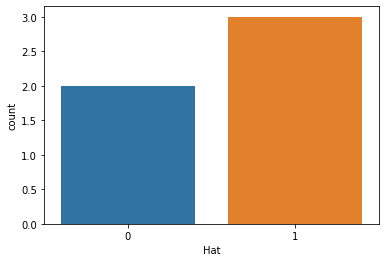

In [ ]:
sns.countplot(x='Hat', data=df_int)

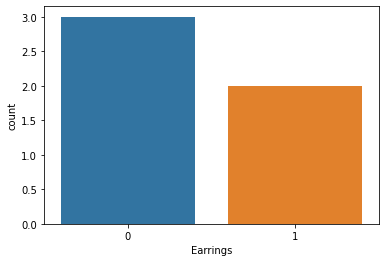

In [ ]:
sns.countplot(x='Earrings', data=df_int)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4832c514d0>,
      dtype=object)

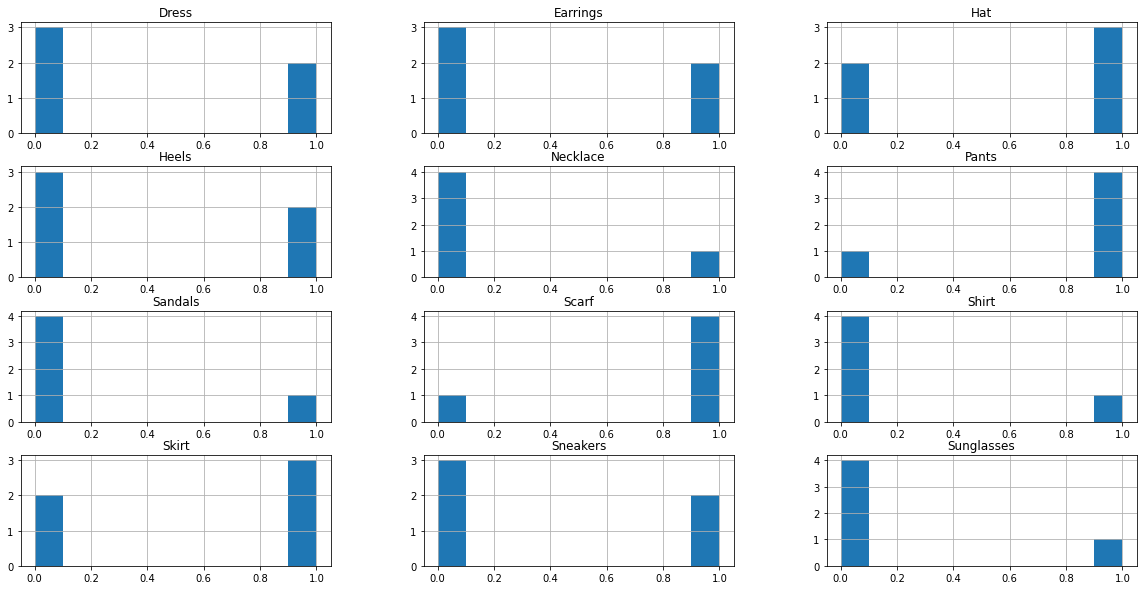

In [ ]:
df_int.hist(figsize=(20,10))

In [ ]:
df_int.value_counts()

Dress  Earrings  Hat  Heels  Necklace  Pants  Sandals  Scarf  Shirt  Skirt  Sneakers  Sunglasses
1      1         1    1      1         0      0        1      0      0      0         0             1
       0         0    1      0         1      1        1      0      0      0         0             1
0      1         0    0      0         1      0        1      1      1      0         0             1
       0         1    0      0         1      0        1      0      1      1         0             1
                                                       0      0      1      1         1             1
dtype: int64

In [ ]:
# Product Frequency / Total Sales
first = pd.DataFrame(df.sum() / df.shape[0], columns = ["Support"]).sort_values("Support", ascending = False)
first

,Support
Pants,0.8
Scarf,0.8
Hat,0.6
Skirt,0.6
Dress,0.4
Earrings,0.4
Heels,0.4
Sneakers,0.4
Necklace,0.2
Sandals,0.2


In [ ]:
# Apriori
freq_items = apriori(df, min_support = 0.5, use_colnames = True)
freq_items.sort_values("support", ascending = False)

,support,itemsets
1,0.8,(Pants)
2,0.8,(Scarf)
0,0.6,(Hat)
3,0.6,(Skirt)
4,0.6,"(Pants, Scarf)"
5,0.6,"(Skirt, Pants)"


In [ ]:
# Association Rules & Info
df_conf = association_rules(freq_items, metric = "confidence", min_threshold = 0.5)
df_conf

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Pants),(Scarf),0.8,0.8,0.6,0.75,0.9375,-0.04,0.8
1,(Scarf),(Pants),0.8,0.8,0.6,0.75,0.9375,-0.04,0.8
2,(Skirt),(Pants),0.6,0.8,0.6,1.00,1.2500,0.12,inf
3,(Pants),(Skirt),0.8,0.6,0.6,0.75,1.2500,0.12,1.6


In [ ]:
association_rules(freq_items,metric="lift", min_threshold=0.5)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Pants),(Scarf),0.8,0.8,0.6,0.75,0.9375,-0.04,0.8
1,(Scarf),(Pants),0.8,0.8,0.6,0.75,0.9375,-0.04,0.8
2,(Skirt),(Pants),0.6,0.8,0.6,1.00,1.2500,0.12,inf
3,(Pants),(Skirt),0.8,0.6,0.6,0.75,1.2500,0.12,1.6


#Part II : bigger dataset

In [24]:
ch = "/content/drive/MyDrive/Market_Basket_Optimisation.csv"

In [25]:
data = pd.read_csv(ch, header=None)

In [26]:
data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,butter,light mayo,fresh bread,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7497,burgers,frozen vegetables,eggs,french fries,magazines,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7498,chicken,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7499,escalope,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
# most 10 frequent products
pd.DataFrame(data[0].value_counts()[:10])

,0
mineral water,577
burgers,576
turkey,458
chocolate,391
frozen vegetables,373
spaghetti,354
shrimp,325
grated cheese,293
eggs,279
cookies,270


* Preprocessing

* make our data in a list of a list (making each customers shopping items in an identical list)

In [28]:
from mlxtend.preprocessing import TransactionEncoder

In [29]:
len_ = len(data)

In [30]:
trans = []
for i in range(1, len_):
    trans.append([str(data.values[i,j]) for j in range(0, 20)])

# conveting it into an numpy array
trans = np.array(trans)

In [31]:
trans.shape

(7500, 20)

In [32]:
trans[0]

array(['burgers', 'meatballs', 'eggs', 'nan', 'nan', 'nan', 'nan', 'nan',
       'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan',
       'nan', 'nan', 'nan'], dtype='<U20')

In [33]:
trans[8]

array(['french fries', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan',
       'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan',
       'nan', 'nan', 'nan'], dtype='<U20')

* Apriori Preparation
     * transform our dataset into a one-hot-encoded Dataframe


In [34]:
te_ = TransactionEncoder()
data = te_.fit(trans).transform(trans)


In [35]:
data = pd.DataFrame(data, columns = te_.columns_)


In [36]:
data.head()

,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,body spray,bramble,brownies,bug spray,burger sauce,burgers,butter,cake,candy bars,carrots,cauliflower,cereals,champagne,chicken,chili,chocolate,chocolate bread,chutney,cider,clothes accessories,cookies,cooking oil,corn,cottage cheese,cream,dessert wine,eggplant,eggs,energy bar,energy drink,...,oil,olive oil,pancakes,parmesan cheese,pasta,pepper,pet food,pickles,protein bar,red wine,rice,salad,salmon,salt,sandwich,shallot,shampoo,shrimp,soda,soup,spaghetti,sparkling water,spinach,strawberries,strong cheese,tea,tomato juice,tomato sauce,tomatoes,toothpaste,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [37]:
data.describe(include="all")

,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,body spray,bramble,brownies,bug spray,burger sauce,burgers,butter,cake,candy bars,carrots,cauliflower,cereals,champagne,chicken,chili,chocolate,chocolate bread,chutney,cider,clothes accessories,cookies,cooking oil,corn,cottage cheese,cream,dessert wine,eggplant,eggs,energy bar,energy drink,...,oil,olive oil,pancakes,parmesan cheese,pasta,pepper,pet food,pickles,protein bar,red wine,rice,salad,salmon,salt,sandwich,shallot,shampoo,shrimp,soda,soup,spaghetti,sparkling water,spinach,strawberries,strong cheese,tea,tomato juice,tomato sauce,tomatoes,toothpaste,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
count,7500,7500,7500,7500,7500,7500,7500,7500,7500,7500,7500,7500,7500,7500,7500,7500,7500,7500,7500,7500,7500,7500,7500,7500,7500,7500,7500,7500,7500,7500,7500,7500,7500,7500,7500,7500,7500,7500,7500,7500,...,7500,7500,7500,7500,7500,7500,7500,7500,7500,7500,7500,7500,7500,7500,7500,7500,7500,7500,7500,7500,7500,7500,7500,7500,7500,7500,7500,7500,7500,7500,7500,7500,7500,7500,7500,7500,7500,7500,7500,7500
unique,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
top,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
freq,7499,7348,7434,7465,7251,7466,7435,7419,7393,7431,7414,7486,7247,7435,7456,6846,7274,6892,7427,7385,7464,7307,7149,7050,7454,6271,7468,7469,7421,7437,6897,7117,7464,7262,7493,7467,7401,6152,7297,7301,...,7327,7007,6787,7351,7382,7301,7451,7455,7361,7289,7359,7464,7182,7431,7466,7442,7463,6965,7453,7121,6194,7453,7448,7340,7442,7471,7273,7394,6987,7439,7031,7308,7497,7376,7431,7279,7061,7415,7295,7429


In [38]:
data.isnull().sum()

 asparagus           0
almonds              0
antioxydant juice    0
asparagus            0
avocado              0
                    ..
whole wheat pasta    0
whole wheat rice     0
yams                 0
yogurt cake          0
zucchini             0
Length: 121, dtype: int64

In [39]:
len(data.columns)

121

* Remove NaN feature from our list

In [40]:
data.drop('nan', axis=1, inplace=True)

In [41]:
len(data.columns)

120

# Apriori Algorithm

In [42]:
frequent_itemsets_apriori = apriori(data, 
                                    min_support = 0.003, 
                                    use_colnames= True)

frequent_itemsets_apriori['length'] = frequent_itemsets_apriori['itemsets'].apply(lambda x: len(x))
frequent_itemsets_apriori

,support,itemsets,length
0,0.020267,(almonds),1
1,0.008800,(antioxydant juice),1
2,0.004667,(asparagus),1
3,0.033200,(avocado),1
4,0.004533,(babies food),1
...,...,...,...
1437,0.003067,"(mineral water, spaghetti, ground beef, pancakes)",4
1438,0.003067,"(mineral water, ground beef, spaghetti, tomatoes)",4
1439,0.003333,"(mineral water, olive oil, spaghetti, milk)",4
1440,0.003067,"(mineral water, shrimp, spaghetti, milk)",4


* generate **Association Rules** for apriori item set

In [43]:
Apriori_rules_confidence = association_rules(frequent_itemsets_apriori, 
                                             metric= "confidence", 
                                             min_threshold= 0.1)

Apriori_rules_confidence["antecedent_len"] = Apriori_rules_confidence["antecedents"].apply(lambda x: len(x))
Apriori_rules_confidence

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len
0,(almonds),(burgers),0.020267,0.087200,0.005200,0.256579,2.942419,0.003433,1.227837,1
1,(almonds),(cake),0.020267,0.081067,0.003067,0.151316,1.866560,0.001424,1.082774,1
2,(almonds),(chocolate),0.020267,0.163867,0.006000,0.296053,1.806668,0.002679,1.187778,1
3,(almonds),(eggs),0.020267,0.179733,0.006533,0.322368,1.793593,0.002891,1.210491,1
4,(almonds),(french fries),0.020267,0.170933,0.004400,0.217105,1.270117,0.000936,1.058976,1
...,...,...,...,...,...,...,...,...,...,...
2562,"(mineral water, tomatoes, milk)",(spaghetti),0.006533,0.174133,0.003333,0.510204,2.929962,0.002196,1.686144,3
2563,"(spaghetti, tomatoes, milk)",(mineral water),0.005867,0.238267,0.003333,0.568182,2.384647,0.001936,1.764014,3
2564,"(mineral water, tomatoes)","(spaghetti, milk)",0.024400,0.035467,0.003333,0.136612,3.851843,0.002468,1.117149,2
2565,"(spaghetti, tomatoes)","(mineral water, milk)",0.020933,0.048000,0.003333,0.159236,3.317410,0.002329,1.132303,2


In [49]:
frequent_itemsets_apriori['length']

0       1
1       1
2       1
3       1
4       1
       ..
1437    4
1438    4
1439    4
1440    4
1441    4
Name: length, Length: 1442, dtype: int64

In [54]:

# length = 2 ==> mean 2 items in the itemset 
frequent_itemsets_apriori [ (frequent_itemsets_apriori['length'] == 2) & (frequent_itemsets_apriori['support'] >=0.03) ]

,support,itemsets,length
333,0.033200,"(chocolate, eggs)",2
337,0.034400,"(chocolate, french fries)",2
354,0.032133,"(chocolate, milk)",2
355,0.052667,"(chocolate, mineral water)",2
370,0.039200,"(chocolate, spaghetti)",2
434,0.036400,"(eggs, french fries)",2
452,0.030800,"(eggs, milk)",2
453,0.050933,"(mineral water, eggs)",2
467,0.036533,"(spaghetti, eggs)",2
531,0.033733,"(mineral water, french fries)",2


* it's nice to identify rules that have a high **support**,
* here we have high support with: 
    + spaguetti, mineral water
    + choclaten mineral water,
    + eggs, mineral water

* **Association Mining**

In [55]:
frequent_itemsets_apriori[ frequent_itemsets_apriori['itemsets'] == {'eggs', 'mineral water'} ]

,support,itemsets,length
453,0.050933,"(mineral water, eggs)",2


In [56]:
frequent_itemsets_apriori[ frequent_itemsets_apriori['itemsets'] == {'spaghetti', 'mineral water'} ]

,support,itemsets,length
811,0.059733,"(mineral water, spaghetti)",2


In [57]:
frequent_itemsets_apriori[ frequent_itemsets_apriori['itemsets'] == {'chocolate', 'mineral water'} ]

,support,itemsets,length
355,0.052667,"(chocolate, mineral water)",2


* The support count for eggs & mineral water together is 5%, and also for choclate & mineral water.
* the support count almost 6% for spaghetti, mineral water

In [58]:
frequent_itemsets_apriori[ frequent_itemsets_apriori['itemsets'] == {'mineral water'} ]

,support,itemsets,length
69,0.238267,(mineral water),1


* The support count for a client ==> buys mineral water **is quite high** with almost 24%

association rules with lift

In [62]:
Apriori_rules_lift = association_rules(frequent_itemsets_apriori, 
                                             metric= "lift", 
                                             min_threshold= 1.1)

Apriori_rules_lift["antecedent_len"] = Apriori_rules_lift["antecedents"].apply(lambda x: len(x))
Apriori_rules_lift

#threshold > 1 is good

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len
0,(almonds),(burgers),0.020267,0.087200,0.005200,0.256579,2.942419,0.003433,1.227837,1
1,(burgers),(almonds),0.087200,0.020267,0.005200,0.059633,2.942419,0.003433,1.041863,1
2,(cake),(almonds),0.081067,0.020267,0.003067,0.037829,1.866560,0.001424,1.018253,1
3,(almonds),(cake),0.020267,0.081067,0.003067,0.151316,1.866560,0.001424,1.082774,1
4,(chocolate),(almonds),0.163867,0.020267,0.006000,0.036615,1.806668,0.002679,1.016970,1
...,...,...,...,...,...,...,...,...,...,...
4701,"(tomatoes, milk)","(mineral water, spaghetti)",0.014000,0.059733,0.003333,0.238095,3.985969,0.002497,1.234100,2
4702,(mineral water),"(spaghetti, tomatoes, milk)",0.238267,0.005867,0.003333,0.013990,2.384647,0.001936,1.008239,1
4703,(spaghetti),"(mineral water, tomatoes, milk)",0.174133,0.006533,0.003333,0.019142,2.929962,0.002196,1.012855,1
4704,(milk),"(mineral water, spaghetti, tomatoes)",0.129600,0.009333,0.003333,0.025720,2.755732,0.002124,1.016819,1


* visualize apriori most consequent

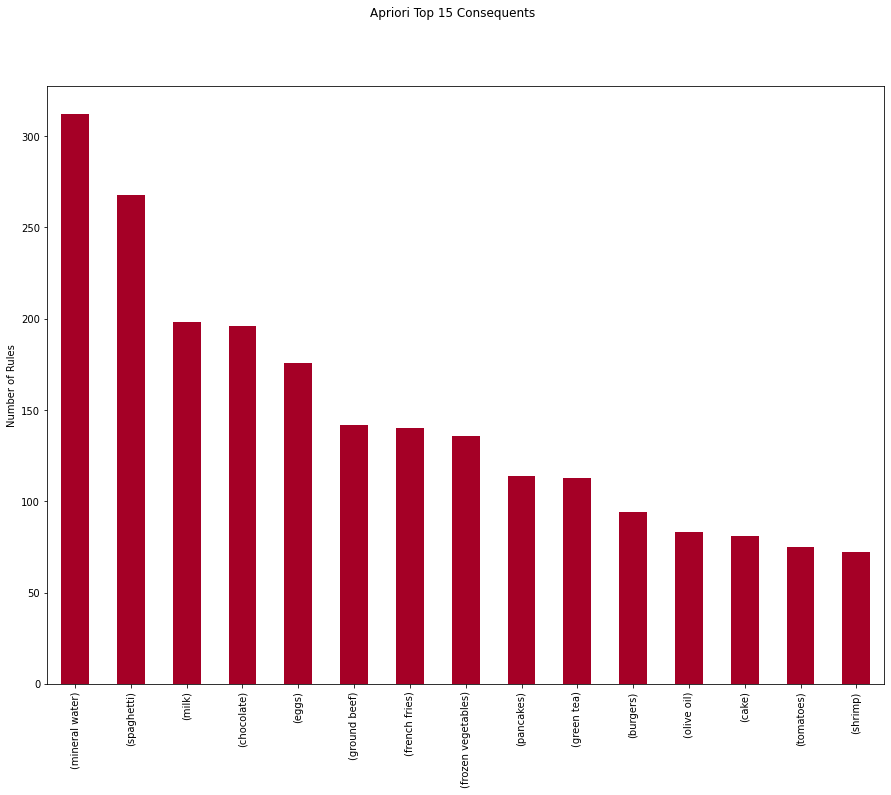

In [ ]:
fig, ax1 = plt.subplots()
fig.suptitle('Apriori Top 15 Consequents')
Apriori_rules_confidence["consequents"].value_counts()[:15].plot(kind='bar', 
                                                                 colormap = 'RdYlBu' , 
                                                                 ax=ax1, 
                                                                 ylabel='Number of Rules')



visualize apriori most antecedents

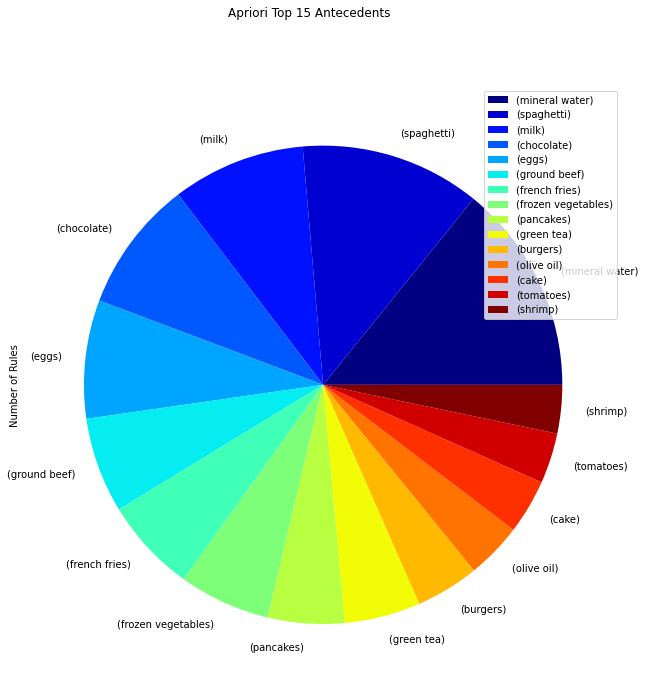

In [ ]:
plt.rcParams['figure.figsize'] = (15, 11)
fig, ax1 = plt.subplots()
fig.suptitle('Apriori Top 15 Antecedents')
Apriori_rules_confidence["antecedents"].value_counts()[:15].plot(kind='pie', 
                                                                 colormap = 'jet' , 
                                                                 ax=ax1, 
                                                                 ylabel='Number of Rules')
plt.legend(loc = "upper right")

#apriori statistics

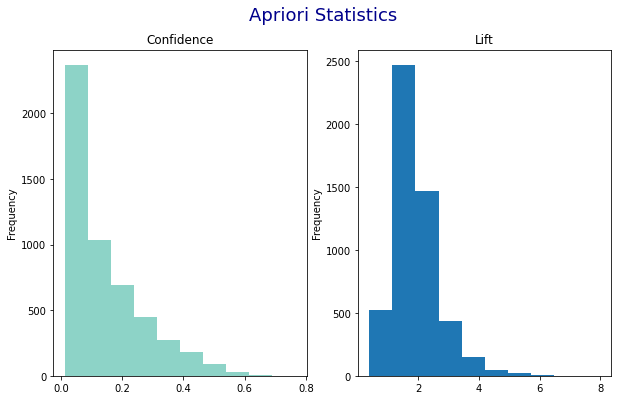

In [ ]:
plt.rcParams['figure.figsize'] = (10,6)
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Apriori Statistics', 
             fontsize = 18,
             color= "darkblue")

# confidence metric
Apriori_rules_confidence.confidence.plot(kind='hist', 
                                         ax= ax1, 
                                         title = 'Confidence', 
                                         colormap = 'Set3')

# Lift metric
Apriori_rules_confidence.lift.plot(kind='hist', 
                                   ax= ax2, 
                                   title = 'Lift', 
                                   colormap = 'tab20')

* **Confidence** is distributed around **0 to 0.6** and **Lift** is distributed around **0.2 to 4**

# Let's resume results and being clear

1. first let's return items and ietmsets with at least 5% support :


In [63]:
freq_items1 = apriori(data,
                      min_support = 0.05,
                      use_colnames = True)

In [64]:
# display the first frequent itemsets with different lenght (one or more products)
freq_items1

,support,itemsets
0,0.087200,(burgers)
1,0.081067,(cake)
2,0.060000,(chicken)
3,0.163867,(chocolate)
4,0.080400,(cookies)
5,0.051067,(cooking oil)
6,0.179733,(eggs)
7,0.079333,(escalope)
8,0.170933,(french fries)
9,0.063200,(frozen smoothie)


2- generate the associatin rules in these frequent itemsets with lift metric with treshold grater then one and see: 

In [66]:
rules_ = association_rules(freq_items1,
                           metric="lift",
                           min_threshold= 1.3)

In [67]:
# display the rules
rules_

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(chocolate),(mineral water),0.163867,0.238267,0.052667,0.321400,1.348907,0.013623,1.122506
1,(mineral water),(chocolate),0.238267,0.163867,0.052667,0.221041,1.348907,0.013623,1.073398
2,(mineral water),(spaghetti),0.238267,0.174133,0.059733,0.250699,1.439698,0.018243,1.102184
3,(spaghetti),(mineral water),0.174133,0.238267,0.059733,0.343032,1.439698,0.018243,1.159468


* here we have 4 rules generated:
    - 32% of oprations containing (chocolate) -> (mineral water)
    - 22% of operations containing (mineral water) -> (chocolate)
    - 25% of operations containing (mineral water) -> (spaghetti)
    - 34% of operations containing (spaghetti) -> (mineral water)


* spaghetti and mineral water is more likely then chocolate and mineral water, it makes sense.
